In [26]:
from transformers import GPT2LMHeadModel

e:\ML and Deep Learning\GPT\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k,v.shape)

e:\ML and Deep Learning\GPT\.venv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hieu3\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

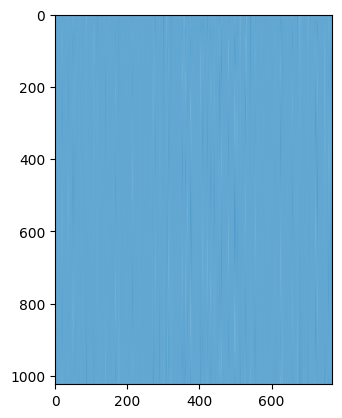

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"],cmap="Blues")

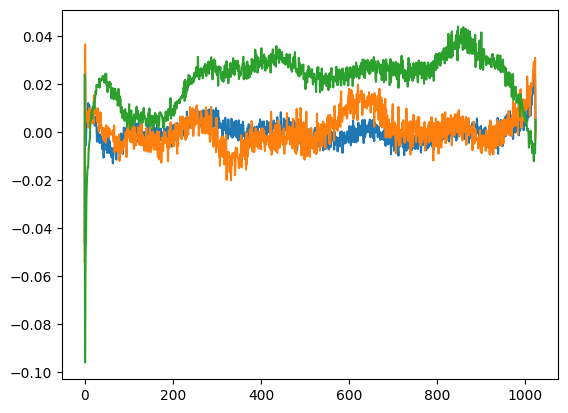

In [11]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

In [ ]:
import tiktoken
import torch
from torch.nn import functional as F
import torch.nn as nn

In [3]:
import torch
x = torch.randn(3,10,5)
y = x[:,0] - x[:,1]
y.shape

torch.Size([3, 5])

In [5]:
query = nn.Linear(6,10)
x = torch.randn(2,4,6)
x = query(x)
x1,x2 = x.split(5,dim=-1)
x1.shape, x2.shape

(torch.Size([2, 4, 5]), torch.Size([2, 4, 5]))

In [59]:
x = torch.randn(3,4,10)
x1,x2 = x.split(5,dim=-1)
x1.shape, x2.shape

(torch.Size([3, 4, 5]), torch.Size([3, 4, 5]))

In [57]:
x = nn.Parameter(torch.zeros(5, dtype=torch.float32).normal_(mean=0,std=0.1))
y = nn.Parameter(torch.zeros(5, dtype=torch.float32).normal_(mean=0,std=0.1))
z = torch.sum(x * y, dim =0)
print(z)
z = torch.sum(x * y,dim=-1)
z


tensor(0.0078, grad_fn=<SumBackward1>)


tensor(0.0078, grad_fn=<SumBackward1>)

In [4]:
num_return_sequences = 5
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode("Hello, I am a language model,")
tokens = torch.tensor(tokens,dtype=torch.long)
x = tokens.unsqueeze(0).repeat(num_return_sequences,1)
x= torch.randn((1,2))
x = F.softmax(x, dim=1)
x

tensor([[0.3943, 0.6057]])

In [10]:
x = torch.randn((5,8,768))
norm = nn.LayerNorm(768)
lin = nn.Linear(768,50)
x = norm(x)
x = lin(x)
x = x[:,-1,:]
x.shape

torch.Size([5, 50])

In [13]:
x = nn.Linear(3,100, bias=True)
x.weight.shape, x.bias.shape

(torch.Size([100, 3]), torch.Size([100]))

In [18]:
x = torch.randn(3, 5)  # Batch of 3 samples, each with 5 features
print(x)
# Define LayerNorm, normalizing over the feature dimension (5 in this case)
layer_norm = nn.LayerNorm(5)

# Apply LayerNorm
output = layer_norm(x)

print(output)
print(output[1].mean())

tensor([[-1.8105,  0.7815,  0.1792,  0.6518,  0.3539],
        [ 0.1701,  0.6863,  2.1750, -0.6005,  0.6562],
        [ 0.0233,  0.1034,  0.1481, -0.7154, -1.4127]])
tensor([[-1.9487,  0.7939,  0.1567,  0.6567,  0.3414],
        [-0.4930,  0.0760,  1.7167, -1.3424,  0.0427],
        [ 0.6470,  0.7786,  0.8520, -0.5662, -1.7114]],
       grad_fn=<NativeLayerNormBackward0>)
tensor(-2.3842e-08, grad_fn=<MeanBackward0>)


In [20]:
x = torch.randn((2,3))
print(x)
x.repeat(0,2)

tensor([[ 0.2171,  1.6081,  0.0392],
        [ 0.1915,  0.7557, -0.6747]])


tensor([], size=(0, 6))

In [24]:

class DataLoader():
    def __init__(self,data,B,T):
        self.data = data
        self.position = 0
        self.B = B
        self.T = T

    def get_batch(self):
        if self.position >= len(self.data):
            self.position = 0
        s = torch.tensor(self.data[self.position:self.position+self.B*self.T+1])
        
        x = s[:self.B*self.T]
        print(x.shape)
        y = s[1:]
        x, y = x.view(self.B,self.T), y.view(self.B,self.T)
        self.position += (self.B*self.T+1)
        return x,y

In [25]:
data = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
dataloader = DataLoader(data=data,B=2,T=5)
x,y = dataloader.get_batch()
x,y

torch.Size([10])


(tensor([[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]]),
 tensor([[ 2,  3,  4,  5,  6],
         [ 7,  8,  9, 10, 11]]))